#### **Building a single layer perceptron without using any framework**

In [1]:
import torch.nn as nn
import pandas as pd
import torch

In [2]:
n_input, n_hidden, n_out, batch_size, learning_rate = 10, 15, 1, 100, 0.01

In [3]:
data_x = torch.randn(batch_size, n_input)
data_y = (torch.rand(size=(batch_size, 1)) < 0.5).float()

In [4]:
print(data_x.shape, data_y.shape)

torch.Size([100, 10]) torch.Size([100, 1])


In [5]:
model = nn.Sequential(nn.Linear(n_input, n_hidden),
                      nn.ReLU(),
                      nn.Linear(n_hidden, n_out),
                      nn.Sigmoid())
print(model)

Sequential(
  (0): Linear(in_features=10, out_features=15, bias=True)
  (1): ReLU()
  (2): Linear(in_features=15, out_features=1, bias=True)
  (3): Sigmoid()
)


In [6]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [7]:
loss_function = nn.MSELoss()

In [8]:
losses = []
for epoch in range(5000):
    pred_y = model(data_x)
    loss = loss_function(pred_y, data_y)
    losses.append(loss.item())

    model.zero_grad()
    loss.backward()

    optimizer.step()

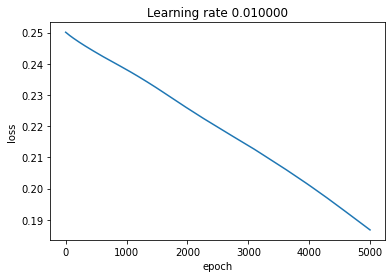

In [9]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title("Learning rate %f"%(learning_rate))
plt.show()

In [ ]:
print(losses)